In [1]:
## overall plan: short and to the point in itemized form
##introduction section
#0 show the node id labels for a single feature each
task0 = "show the node id labels for a single feature each"
#1 show ring network
task1 = "show the ring network "
#2 show ring network for k=[0,...,K] and the adjacency and normalized adjacency matrix as well (3 sets of matrix)
task2 = "show ring/adjacency/S networks and matrices for k=[0,...,N]"
##methodology section
#3 produce a method/tool to monitor/analyze the label changes on the overall network 
#4 show it on a situation with 2D features per node
#5 show how a famous network like Zachary can display a spread of ideologies and monitor
#6 infer the parameters with SGC and then run the simulation on that for same results

#paper points
#we assume that the difference between a markov chain or a 
#control theory perspective is that the markov chain or the 
#recursive function the state of the nodes change. HERE WE ASSUME
#THAT THE NODES STAY THE SAME WITH THEIR NATURAL FIXED PREDISPOSITIONS
#AND THAT THEIR ENVIRONMENT SHIFTS THEIR PERSPECTIVE. 
#so we start with a single features and see how the environment changes
#them according to different degrees of interaction.
#and that the dynamics of the interactions are constant as well.
#we consider 'k' to be equivalent to a social process 'epoch'
#time index which registers new time points of social exchange 
#without underlying user change.

"show ring/adjacency/S networks and matrices for k=[0,...,N]"

In [2]:
using LinearAlgebra, Plots, LightGraphs, DelimitedFiles, Random, StatsPlots


┌ Info: Recompiling stale cache file /home/cool/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/cool/.julia/compiled/v1.2/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


In [3]:
##introduction

In [4]:
NN1 = 20;

blueNodes = [5,10,11,12,14,15];

varX = [];

K_MAX = 15

#all the adjacency matrices at different powers
Adj_Dict = []
#all the normed adjacency matrices at different powers
Adj_Normed_Dict = []

0-element Array{Any,1}

In [5]:
print(varX)

Any[]

In [6]:
function makeSingleFeatureVect()
    global varX
    varX = rand(NN1,1)
    [varX[i] = -1 * rand() for i in blueNodes]
end
makeSingleFeatureVect();

In [7]:
function displaySingleFeature()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            c=cgrad([:blue,:red]))
    return hVarX
end

function displayProjectedFeature(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                c=cgrad([:blue,:red]))
    return hVarX
end
#adding the thresholds for the colors
function displaySingleFeatureThres()    
    global varX
    varXwide = repeat(varX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Node Features",
            yaxis=:flip,aspect_ratio=1.0,
            framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
            yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
            fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

function displayProjectedFeatureThres(projectionX,powerInd)   
    varXwide = repeat(projectionX,outer=(1,6))
    hVarX = heatmap(varXwide,title="Regression power=$(powerInd)",
                yaxis=:flip,aspect_ratio=1.0,
                framestyle=:box,legend=nothing,ylims=(0.5,NN1+0.5),
                yticks=0:1:NN1,xticks=(1:5:6,["" ""]),xlims=(1,6),
                fill=cgrad([:blue,:red]),clims=(-1,1))
    return hVarX
end

displayProjectedFeatureThres (generic function with 1 method)

In [8]:
function vizMatrix(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormed(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]))
    return hAdjNN1
end
#so that the values of the color map are constrained between these values
function vizMatrixThresh(Adj,powerInd)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Adjacency Matrix, power=$(powerInd)",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function vizMatrixNormedThresh(Adj)
    global NN1
    hAdjNN1 = heatmap(Adj,title="Normalized Adjacency",
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN1+1.0),
        legend=true,ylims=(0.0,NN1+0.5),
        yticks=0:5:NN1,xticks=0:5:NN1,
        fill=cgrad([:white,:black]),clims=(0,1))
    return hAdjNN1
end

vizMatrixNormedThresh (generic function with 1 method)

In [9]:
function makeRingAdjacency()
    global NN1
    #make the adjacency for the ring network
    AdjNN1 = zeros(NN1,NN1)
    for ii in 1:size(AdjNN1)[1]
        for jj in 1:size(AdjNN1)[2]            
            if(ii == (jj+1))
                AdjNN1[ii,jj] = 1
            elseif(ii == (jj-1))
                AdjNN1[ii,jj] = 1
            end        
        end
    end
    AdjNN1[1,NN1] = 1
    AdjNN1[NN1,1] = 1    
    return AdjNN1
end

makeRingAdjacency (generic function with 1 method)

In [10]:
function adjacency2Smatrix(AdjMat)
    Adj = deepcopy(AdjMat)
    #make the diagonal for the adj matrix
    diag1 = zeros(size(Adj)[1],size(Adj)[2])
    [diag1[i,i]=1 for i in 1:size(diag1)[1]] 
    #add self-loops as the paper describes
    Adj .+= diag1
    #get degree matrix
    degrees = sum(Adj,dims=2)
    diag2 = zeros(size(Adj)[1],size(Adj)[2])
    [diag2[i,i]=degrees[i] for i in 1:size(diag1)[1]] 
    #make the diagonal matrix to the power of -1/2
    diag2 = diag2^(-1/2)
    #make the normalized S matrix
    S = diag2 * Adj * diag2
    return S
end    
    

adjacency2Smatrix (generic function with 1 method)

In [11]:
#define associated vector of attributes for each node that can be eg [burger, pizza]
#define the identity of each node as training data
function redStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == 1.0)
        return "#FF5555"
    elseif(rpol == 0.9)
        return "#FE5555"
    elseif(rpol == 0.8)
        return "#EE6666"    
     elseif(rpol == 0.7)
        return "#ED6666"
     elseif(rpol == 0.6)
        return "#DD7777" 
    elseif(rpol == 0.5)
        return "#DC7777"
        elseif(rpol == 0.4)
        return "#CC8888"
        elseif(rpol == 0.3)
        return "#CB8888"
        elseif(rpol == 0.2)
        return "#BB9999"
        elseif(rpol == 0.1)
        return "#BA9999"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end

function blueStr(pol)
    rpol = round(pol,digits=1)
  
    if(rpol == -1.0)
        return "#5555FF"
    elseif(rpol == -0.9)
        return "#5555FE"
    elseif(rpol == -0.8)
        return "#6666EE"    
     elseif(rpol == -0.7)
        return "#6666ED"
     elseif(rpol == -0.6)
        return "#7777DD" 
    elseif(rpol == -0.5)
        return "#7777DC"
        elseif(rpol == -0.4)
        return "#8888CC"
        elseif(rpol == -0.3)
        return "#8888CB"
        elseif(rpol == -0.2)
        return "#9999BB"
        elseif(rpol == -0.1)
        return "#9999BA"
      elseif(rpol == 0.0)
        return "#AAAAAA"  
    end
end


blueStr (generic function with 1 method)

In [12]:
function singleVarGraphVizImageMake(Adj,imageName)
    global varX
    strNN1=""
    #init
    strNN1 *= "strict digraph graphname { concentrate=true node [shape=circle, style=filled, fontsize=14] "
    #node insertions
    for ii in 1:size(Adj)[1]
        if(varX[ii] >= 0)
            tmpStr = redStr(varX[ii])        
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        else
            tmpStr = blueStr(varX[ii]) 
            strNN1 *= "{node [style=filled,fillcolor=\"$(tmpStr)\"]"
            strNN1 *= " N$(ii) }"   
        end
    end
    #edges insertion
    for ii in 1:size(Adj)[1]
        for jj in 1:size(Adj)[2]
            if(Adj[ii,jj] > 0)
                if(ii != jj)
                    strNN1 *= " N$(ii) -> N$(jj) [dir=both penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
                if(ii == jj)
                    strNN1 *= " N$(ii) -> N$(jj) [penwidth=$(Adj[ii,jj])];" #str *= " c -- d3 -- A2 -- a; "
                end
            end
        end
    end
    #tie off
    strNN1 *= "}";
    fileNameNN1 = "$(imageName).dot"
    filePNGNN1 = "$(imageName).png"
    writedlm( string("./",fileNameNN1), [strNN1] ,quotes=false)
    run(`neato $fileNameNN1 -Tpng -o $filePNGNN1`)
    
end


singleVarGraphVizImageMake (generic function with 1 method)

In [13]:
#task0
println(task0)

show the node id labels for a single feature each


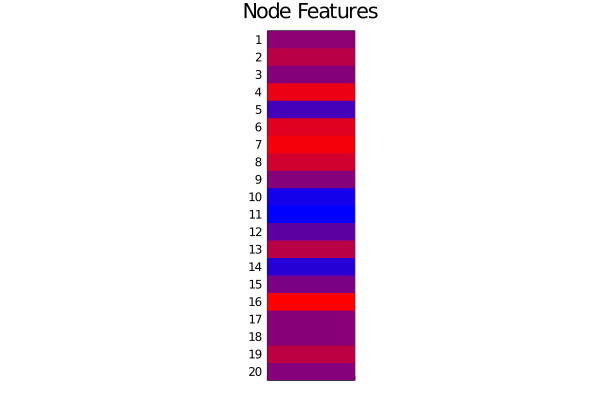

this feature set is fixed as personal inner voice


In [14]:
hVarX = displaySingleFeature()
p=plot(hVarX,layout=1)
display(p)
savefig(p,"nodeSingleFeatures.png")
println("this feature set is fixed as personal inner voice")

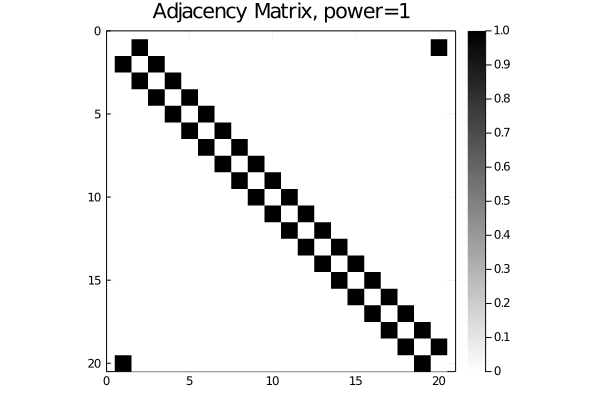

ring adj matrix


In [15]:
adjMatrix = makeRingAdjacency()
hVarX = vizMatrix(adjMatrix,1)
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"adjmatrix.png")
println("ring adj matrix")

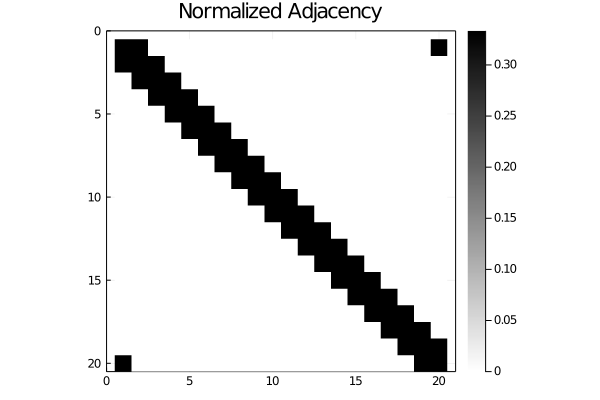

ring adj norm matrix


In [16]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrix))
hVarX2 = vizMatrixNormed(adjMatrixNorm)
p2=plot(hVarX2,layout=1)
display(p2)
savefig(p2,"adjmatrixNorm.png")
println("ring adj norm matrix")
adjMatrixNorm;

In [17]:
#task1
println(task1)

show the ring network 


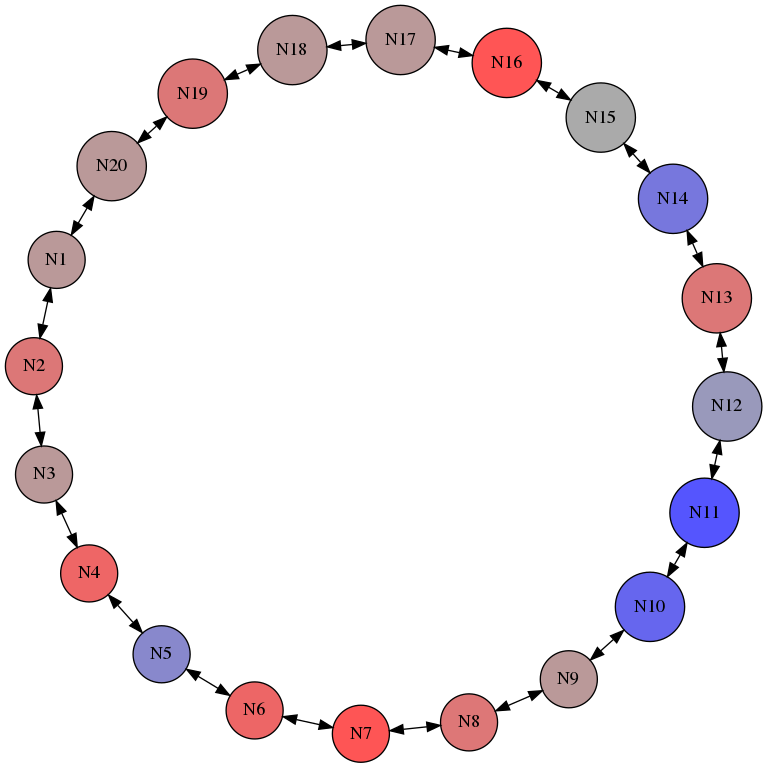

In [18]:
singleVarGraphVizImageMake(adjMatrix,"try")
display("image/png", read("try.png"))

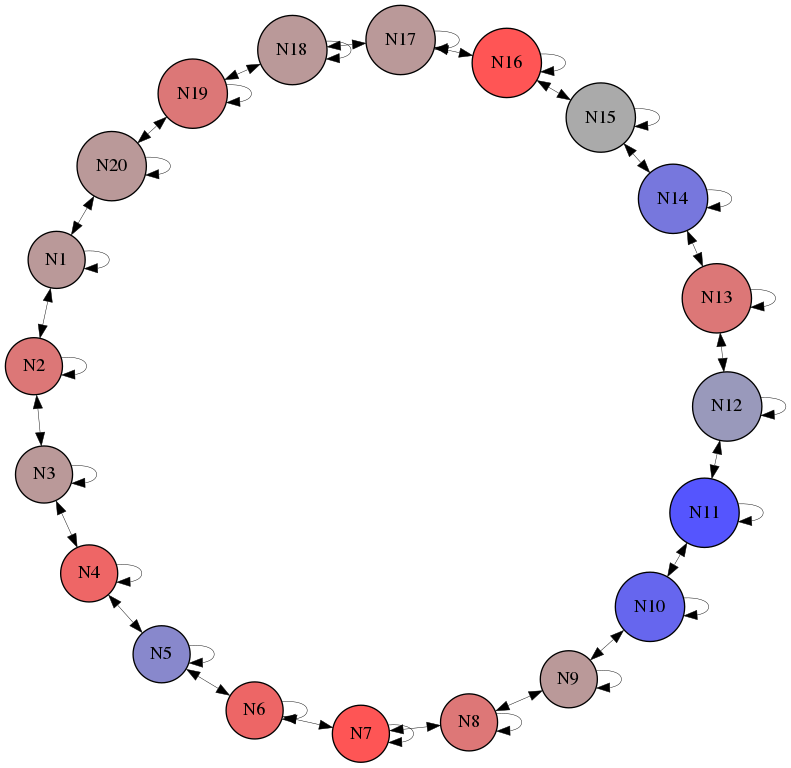

In [19]:
singleVarGraphVizImageMake(adjMatrixNorm,"try2")
display("image/png", read("try2.png"))

In [20]:
#task 2
println(task2)

show ring/adjacency/S networks and matrices for k=[0,...,N]


In [21]:
adjMatrixK1 = makeRingAdjacency()
Adj_Dict = Dict()
for i in 0:K_MAX   
    Adj_Dict[i] = adjMatrixK1^i
end


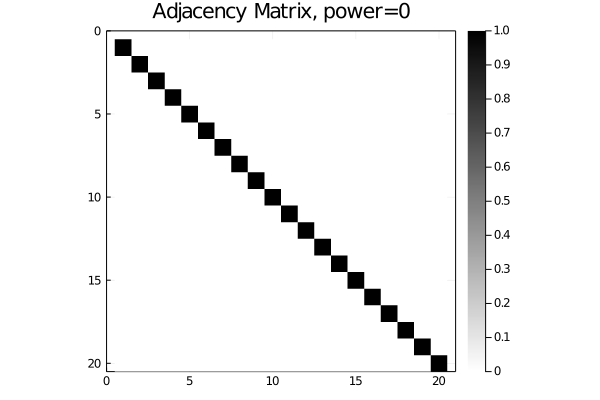

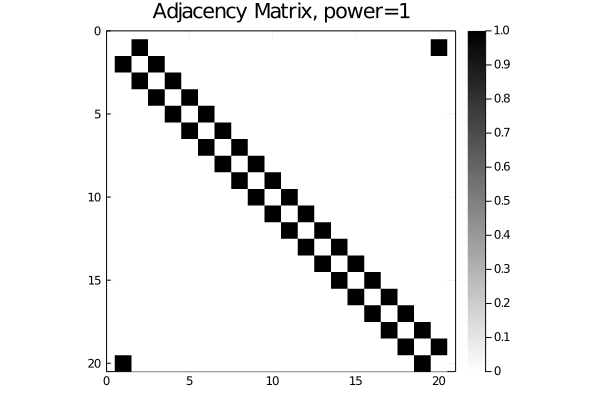

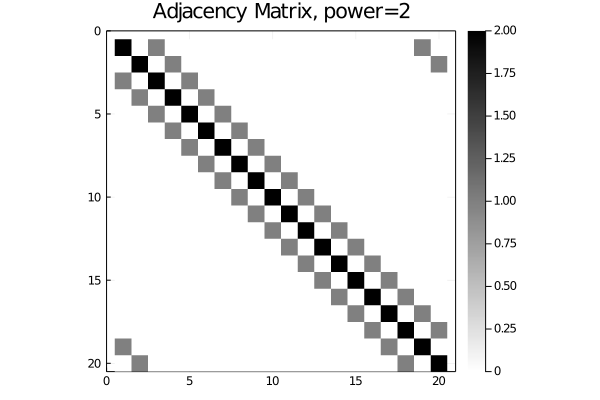

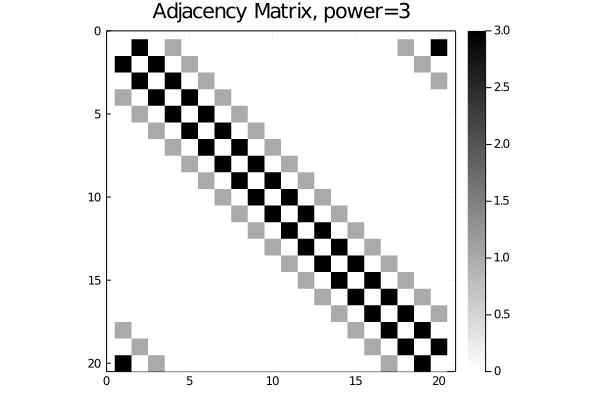

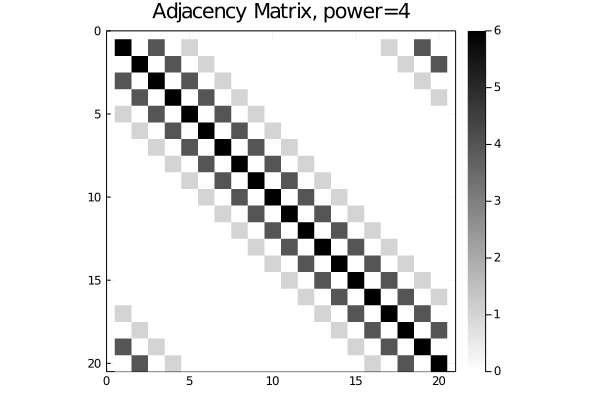

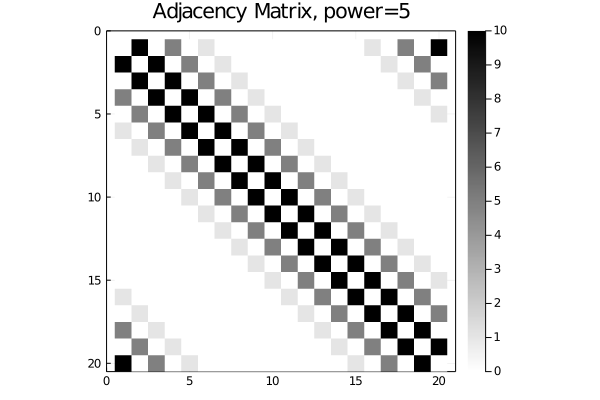

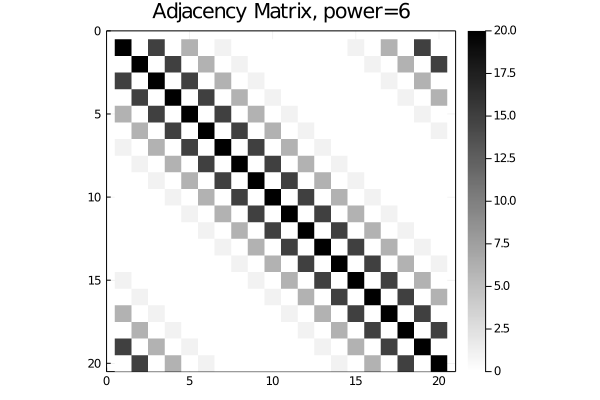

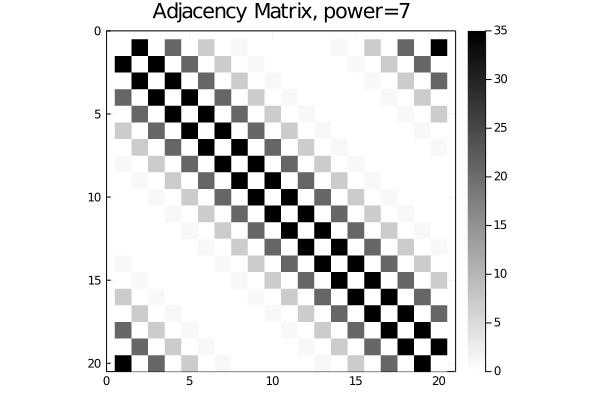

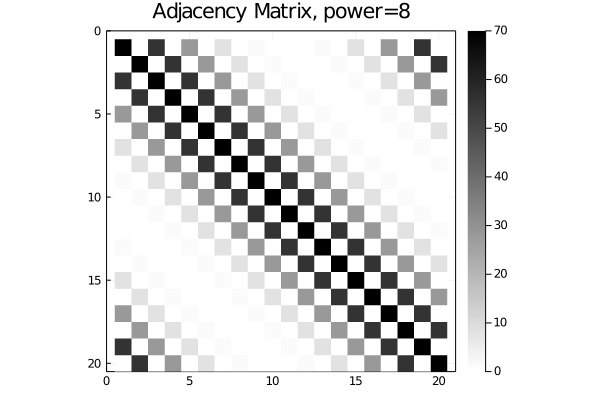

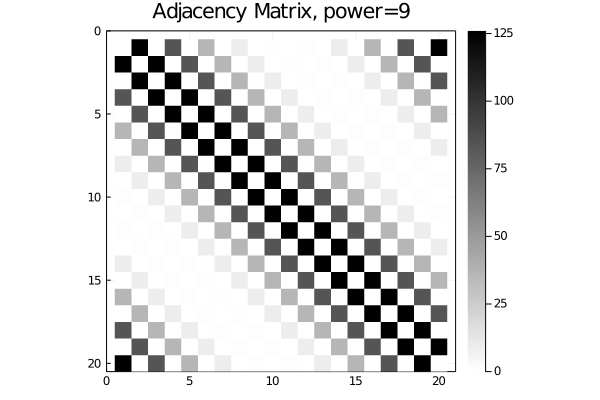

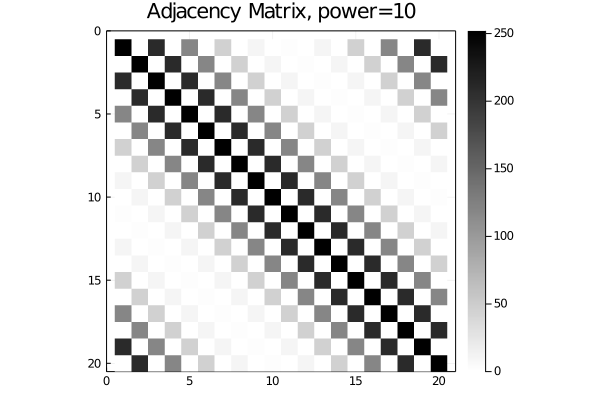

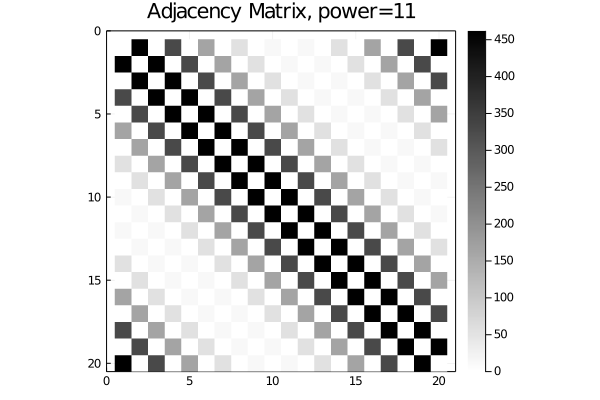

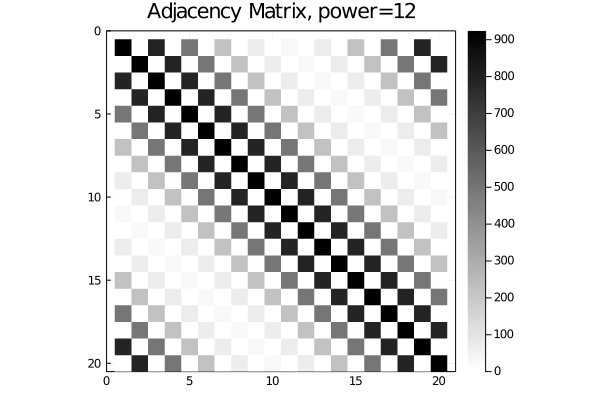

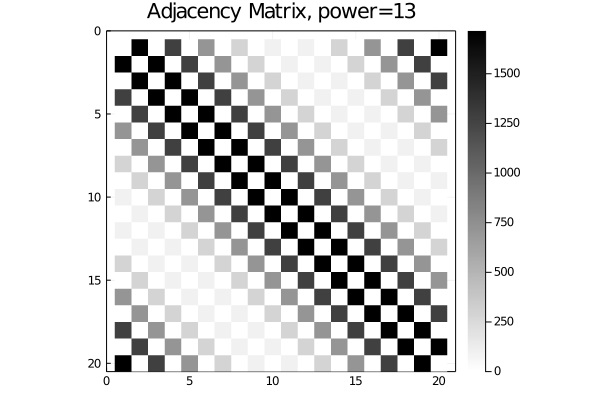

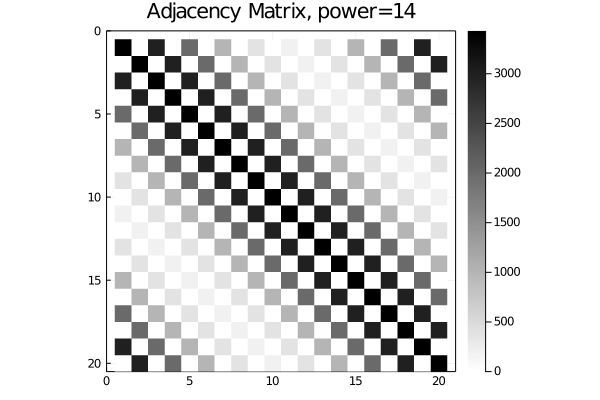

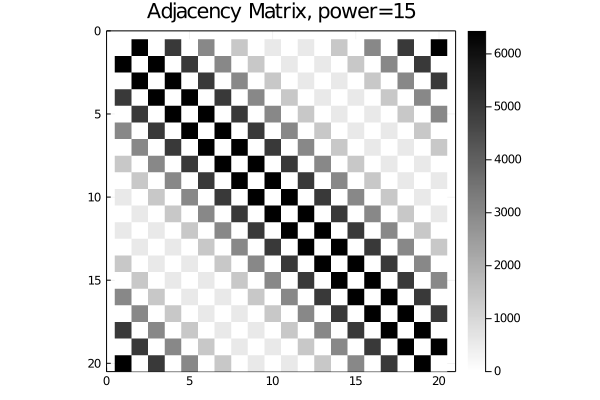

In [22]:
for i in 0:K_MAX   
    hVarX = vizMatrix(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPow$(i).png")    
end


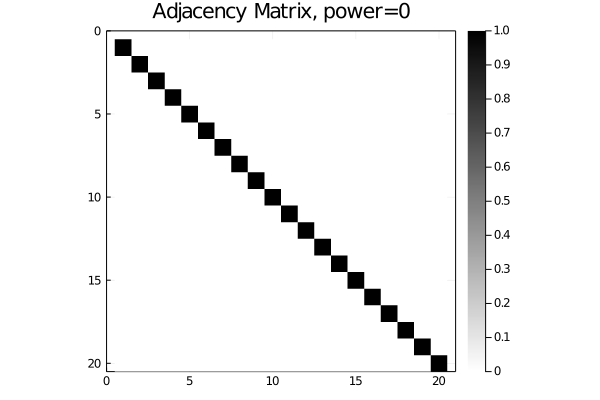

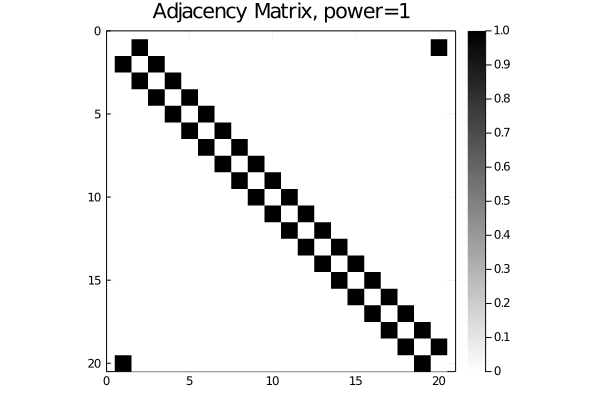

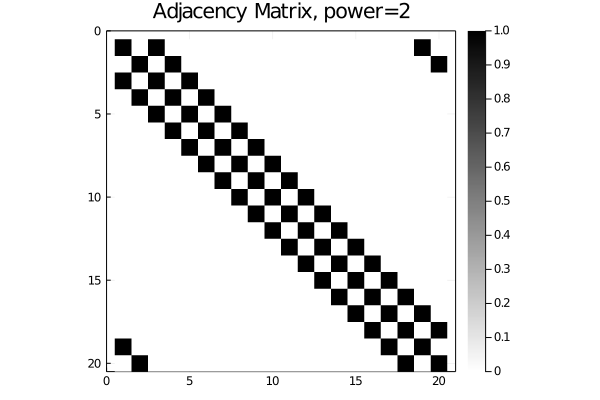

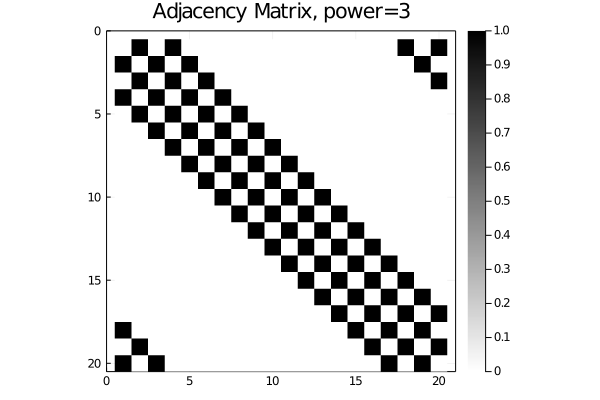

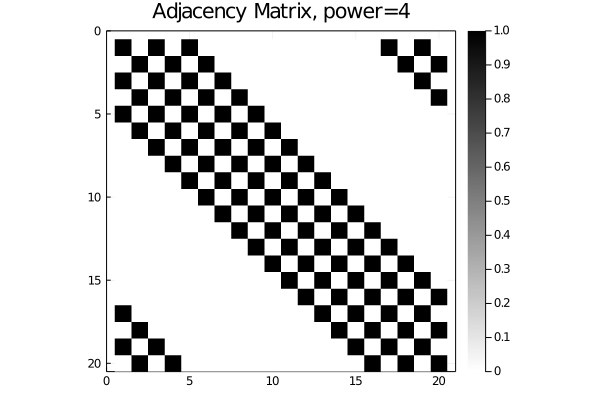

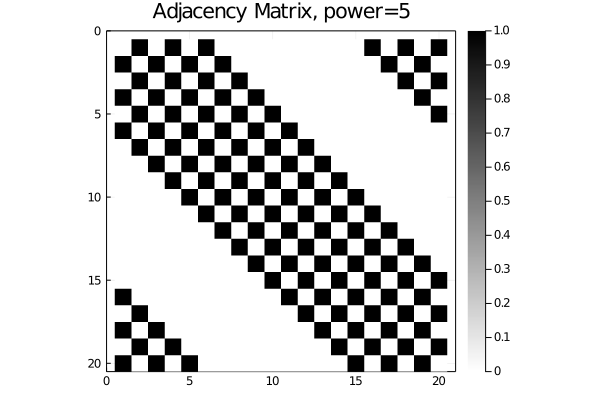

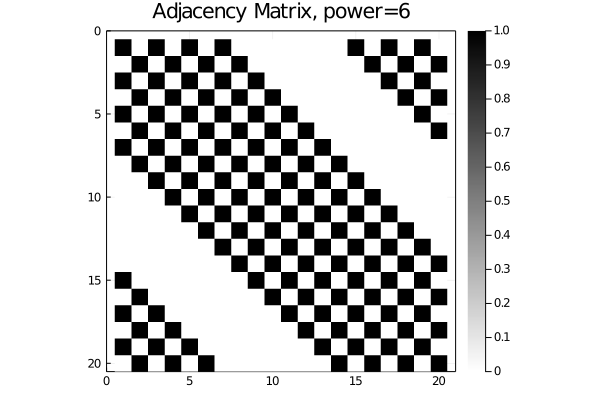

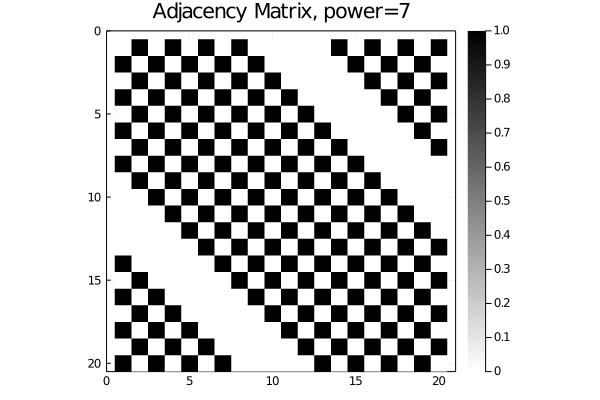

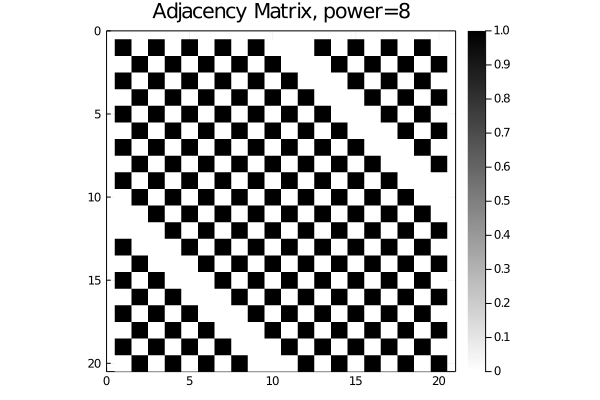

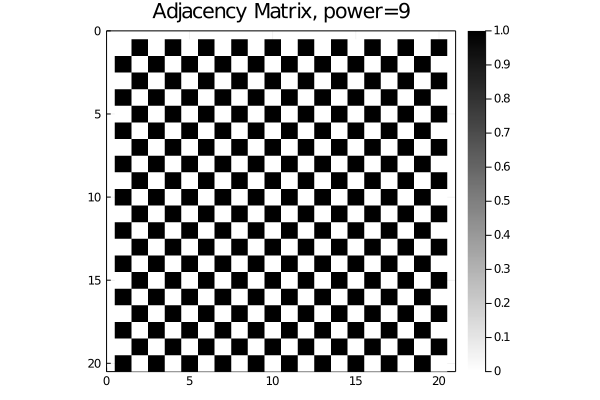

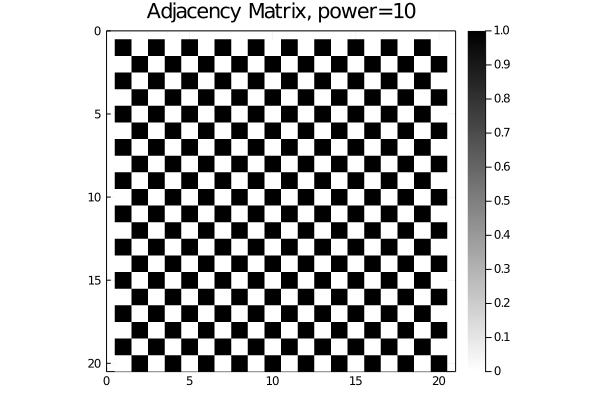

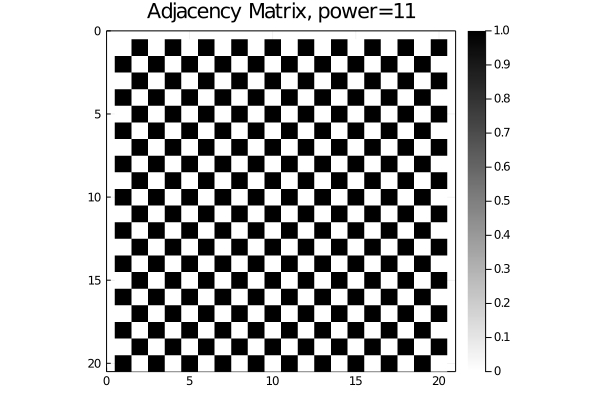

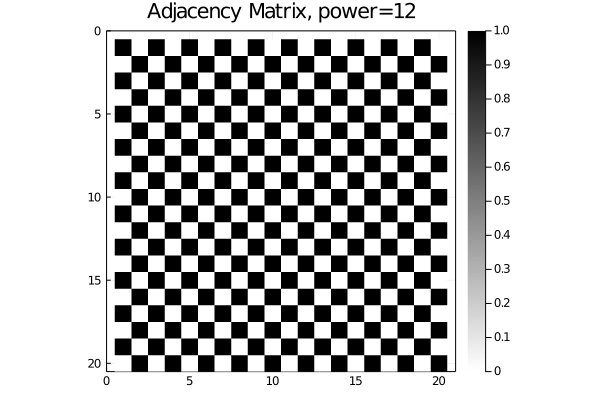

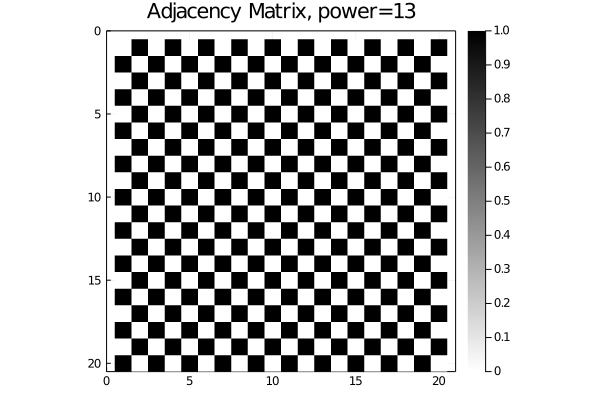

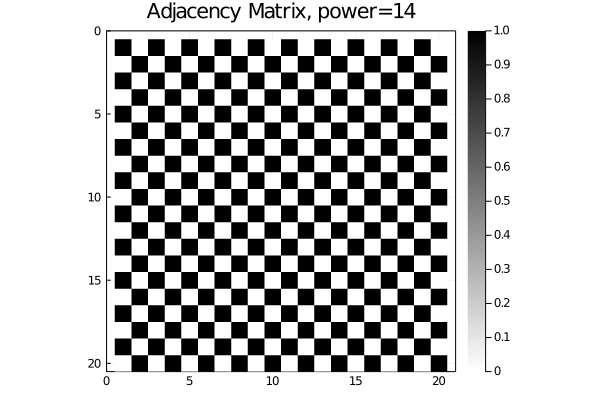

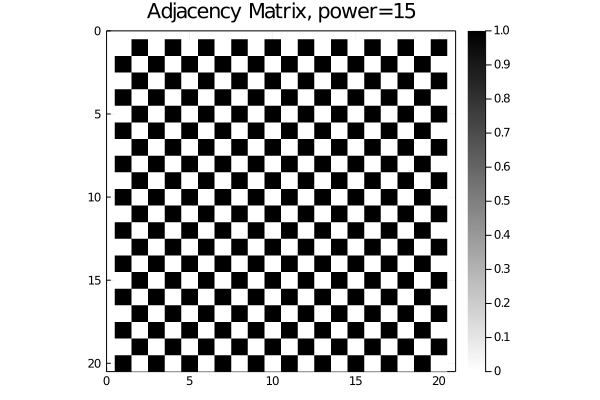

In [23]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjmatrixPowThresh$(i).png")    
end


In [24]:
adjMatrixNorm = adjacency2Smatrix(deepcopy(adjMatrixK1))
Adj_Normed_Dict = Dict()
for i in 0:K_MAX   
    Adj_Normed_Dict[i] = adjMatrixNorm^i
end

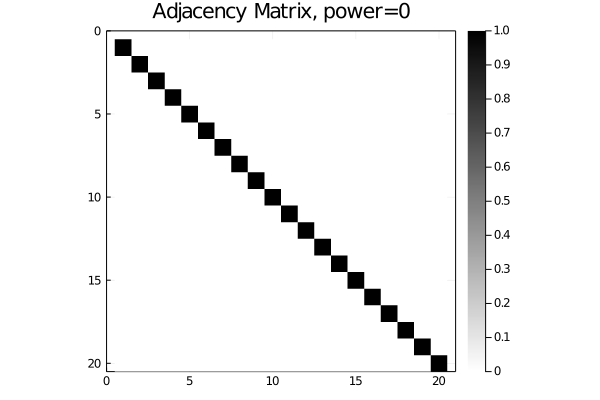

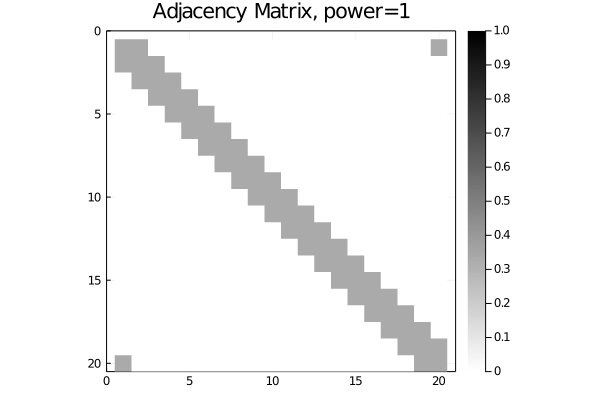

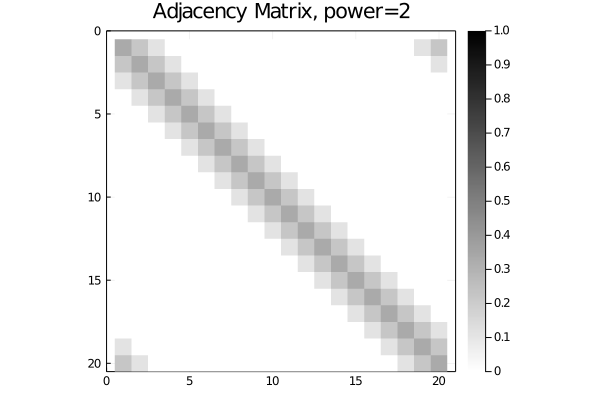

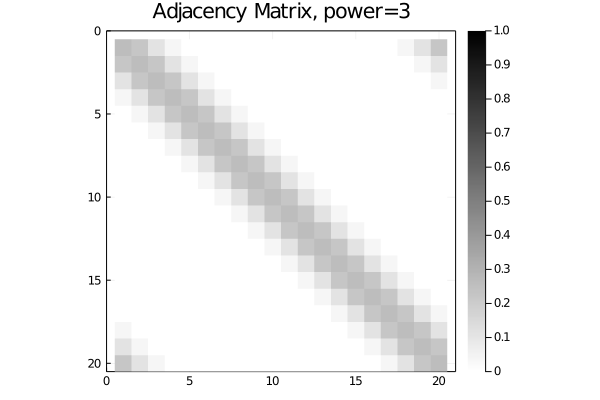

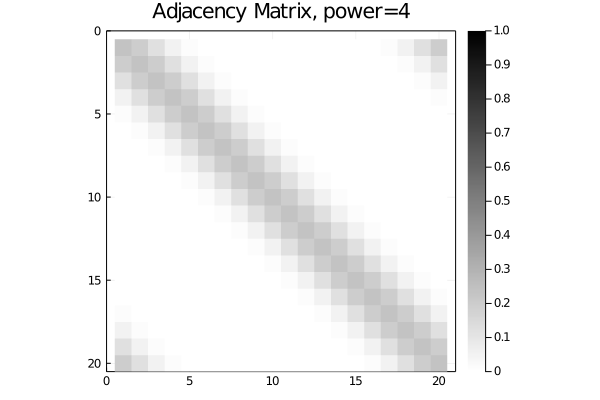

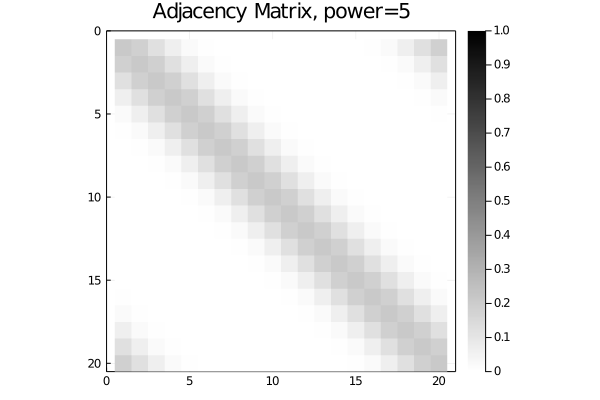

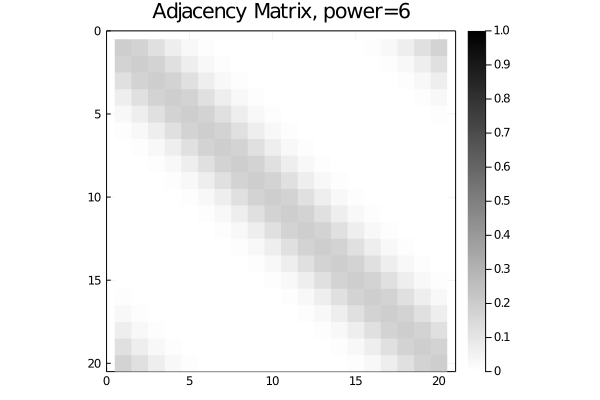

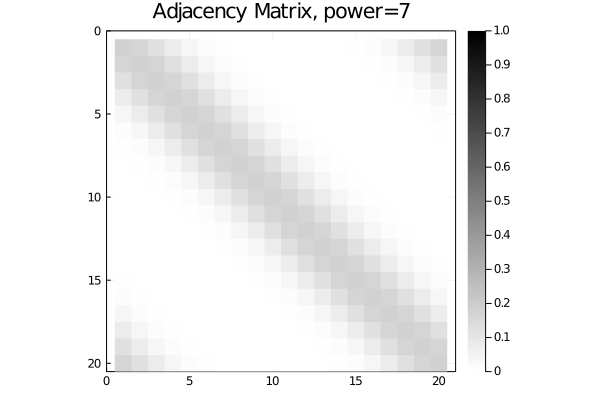

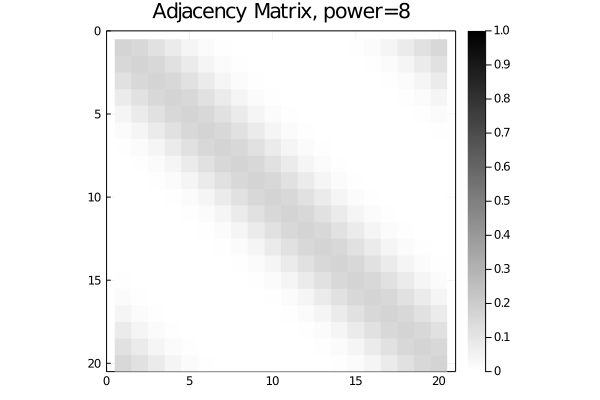

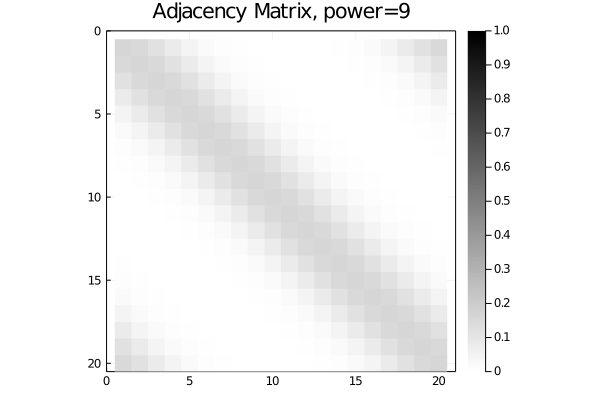

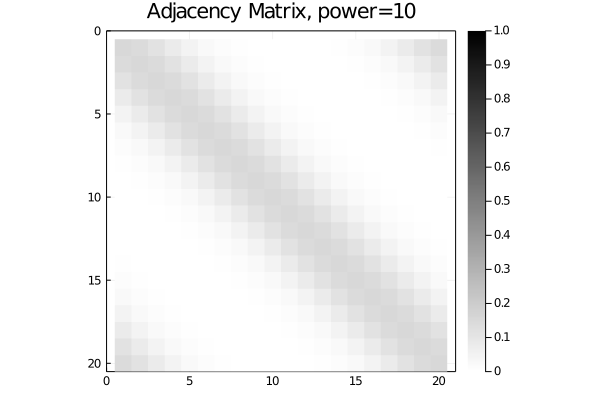

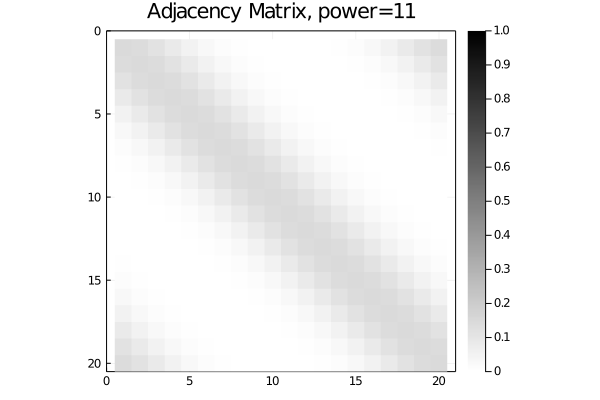

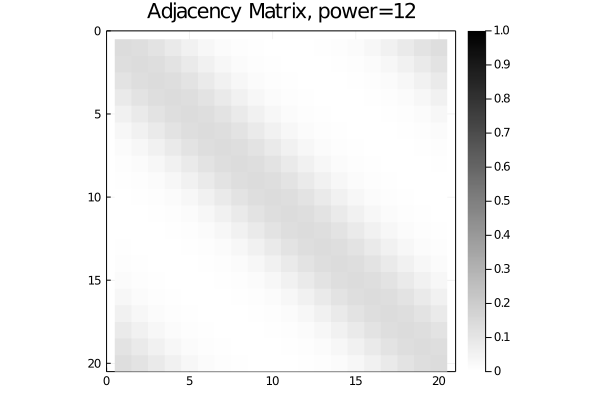

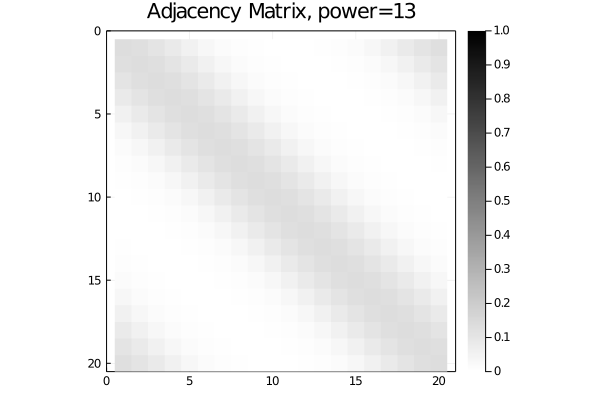

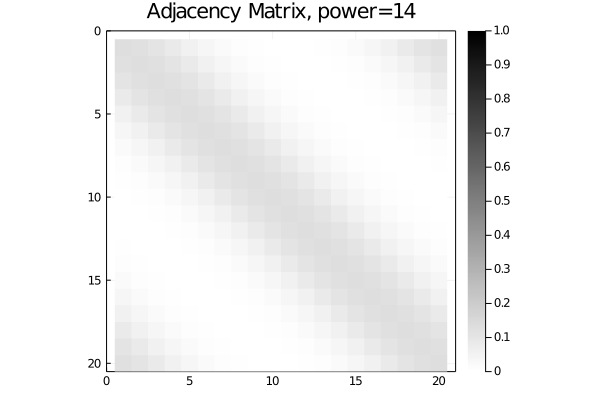

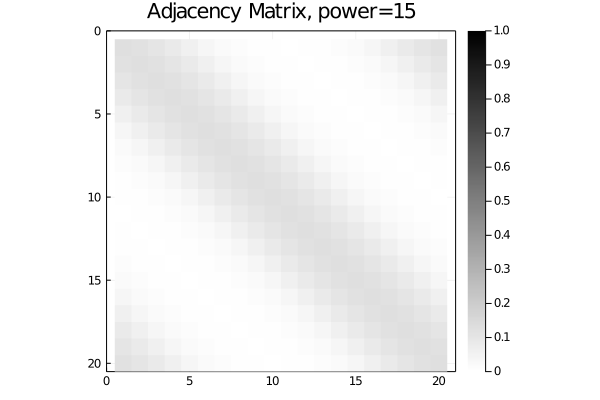

In [25]:
for i in 0:K_MAX   
    hVarX = vizMatrixThresh(Adj_Normed_Dict[i],i)
    p1=plot(hVarX,layout=1)
    display(p1)
    savefig(p1,"adjnormedmatrixPow$(i).png")    
end

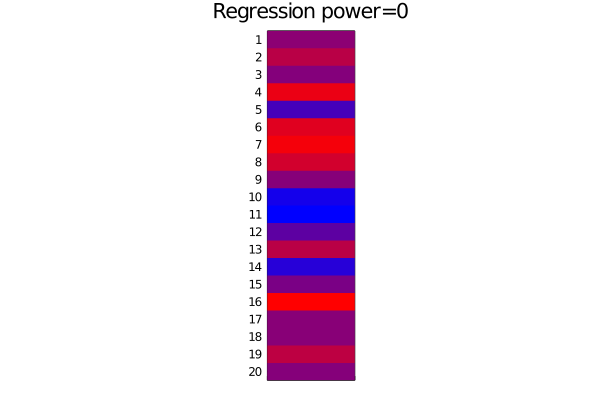

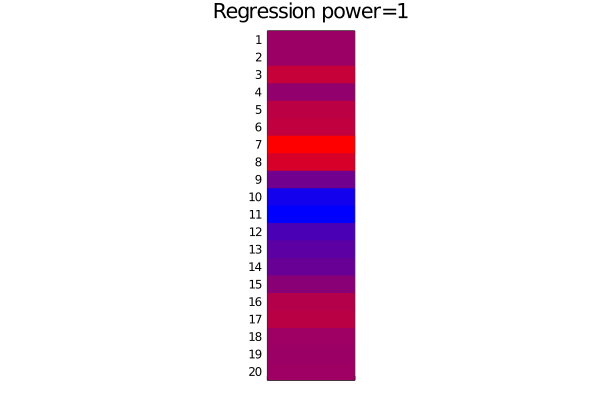

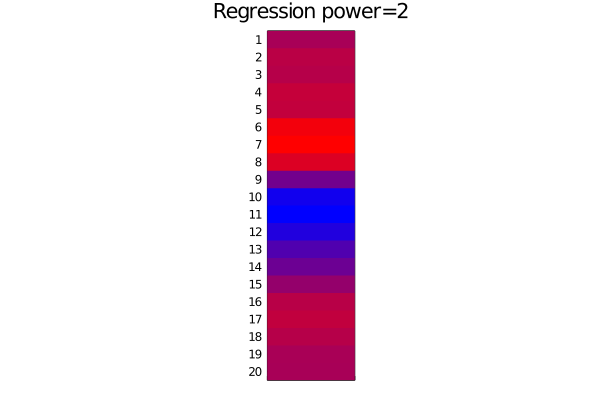

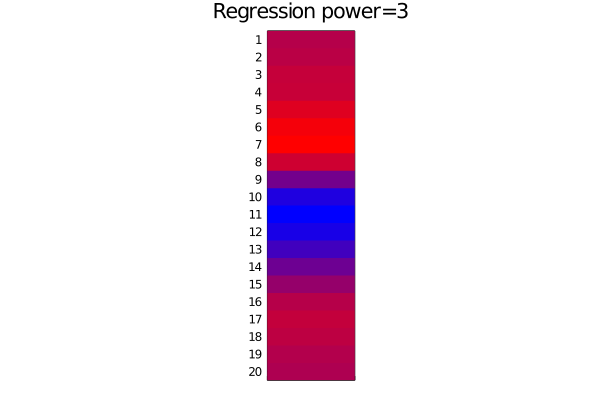

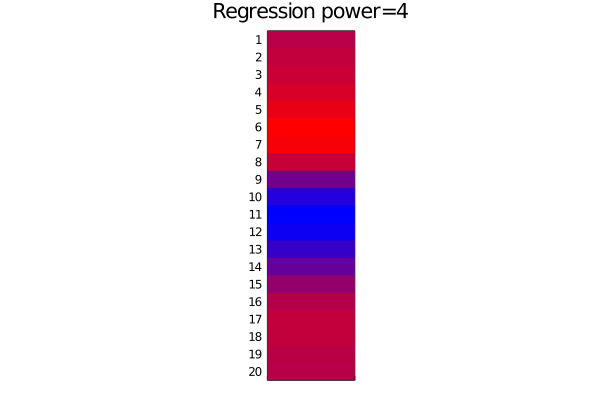

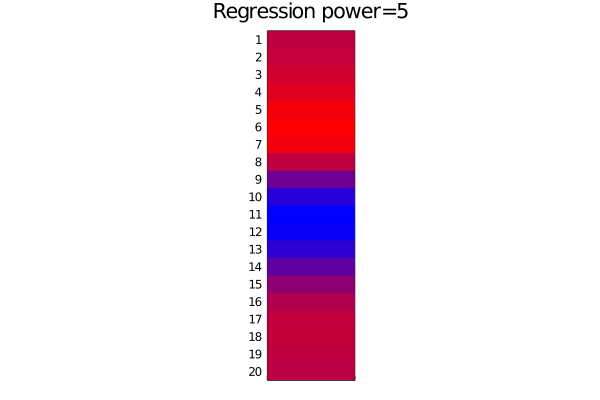

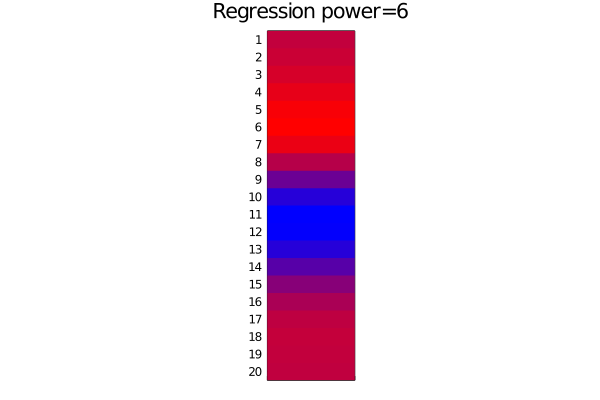

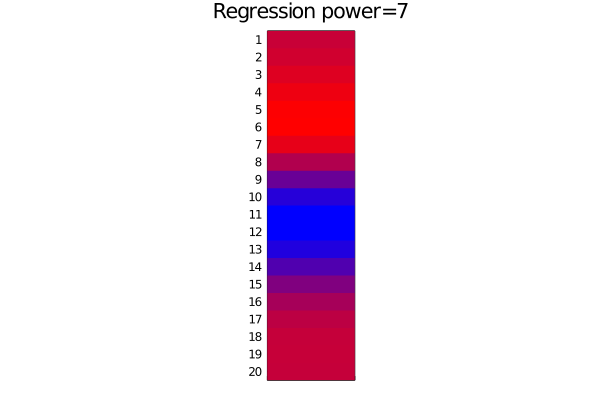

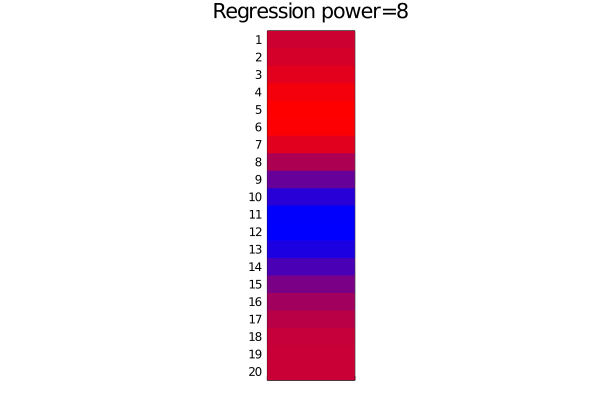

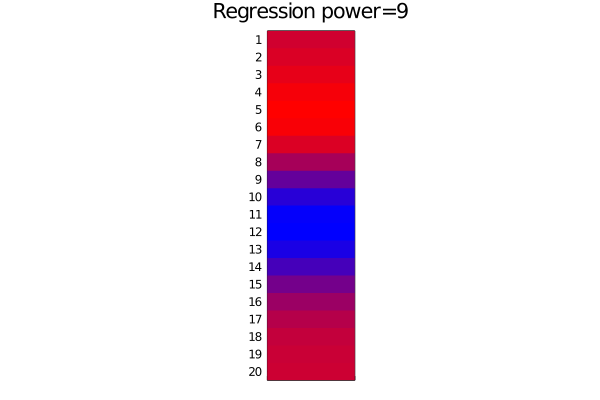

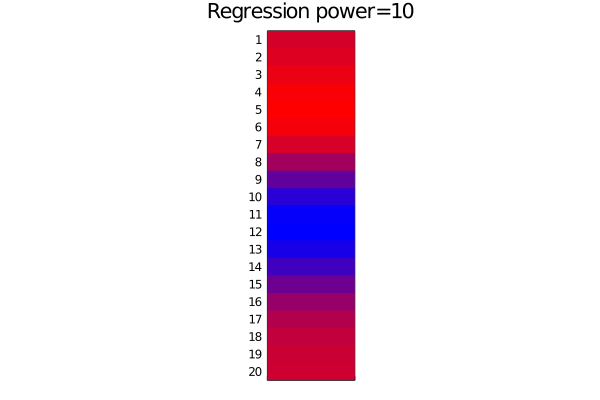

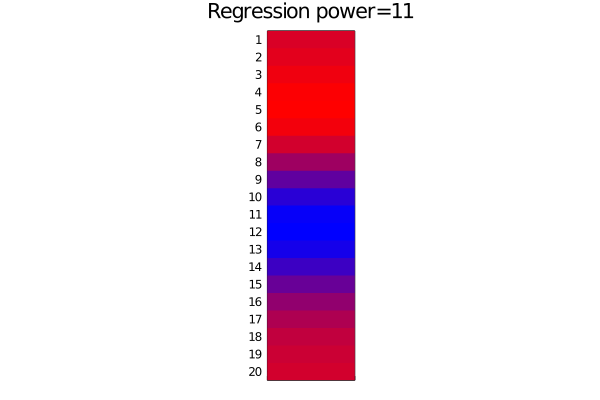

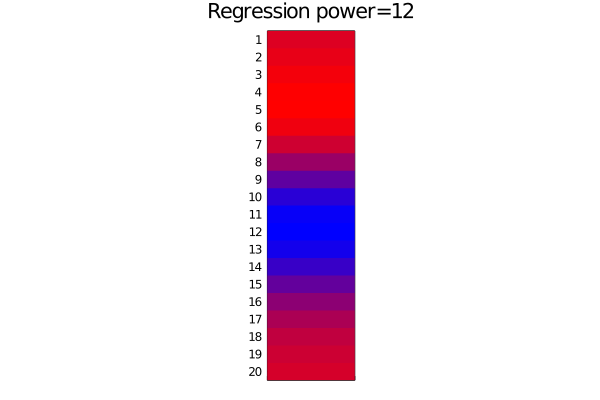

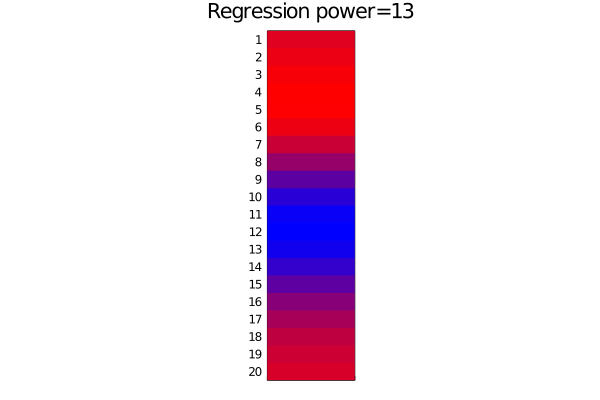

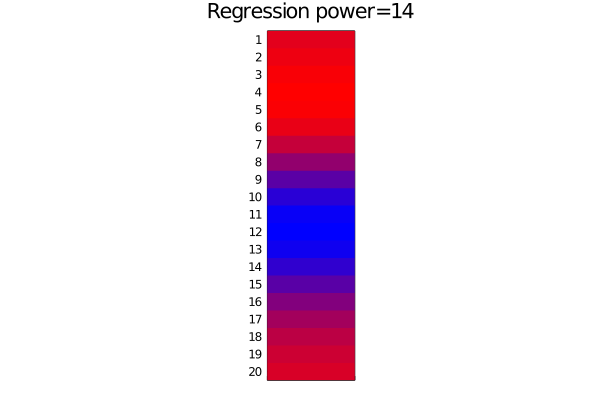

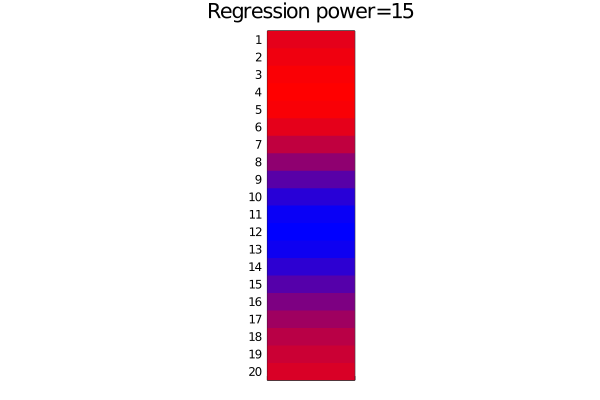

In [26]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeature(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression Pow$(i).png")    
end



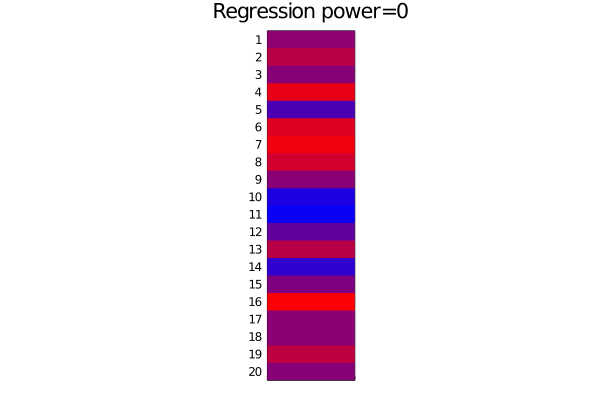

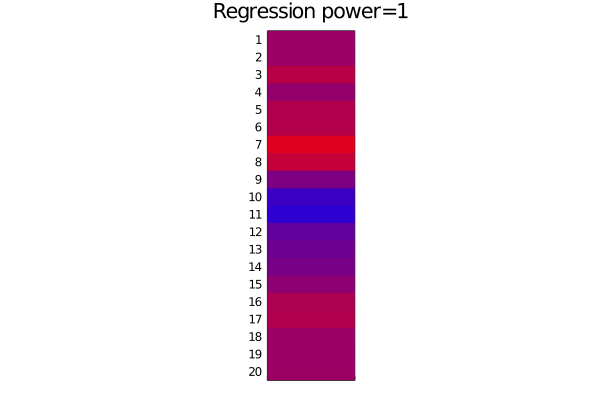

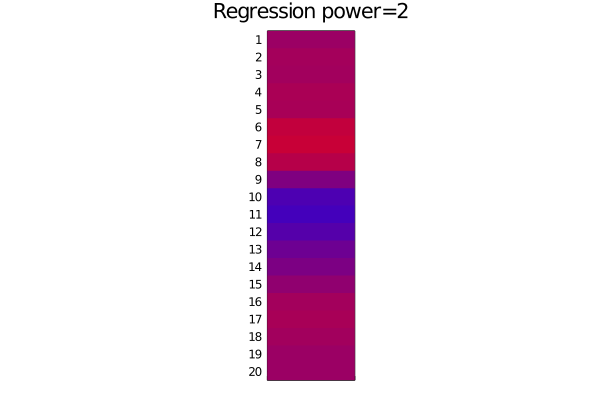

[0.1179758341391921; 0.4518846685714206; 0.058503202048652; 0.8220088421578426; -0.40666926930915737; 0.7435789471081466; 0.8931512070819454; 0.6356232901492389; 0.07412236530246119; -0.7690479453706456; -0.919162851692954; -0.23170846540488443; 0.45394278869038196; -0.6281101286474544; -0.013878825244798998; 0.9702143500220568; 0.08976057371232993; 0.08520151965246447; 0.4822788133652345; 0.06582315346158141]
[0.21189455205739804; 0.20945456825308825; 0.4441322375926384; 0.15794759163244576; 0.386306173318944; 0.41002029496031156; 0.7574511481131102; 0.5342989541778818; -0.019767429972981837; -0.5380294772537128; -0.6399730874894947; -0.2323095094691521; -0.1352919351206523; -0.06268205506729048; 0.1094084653766011; 0.3486986994965292; 0.3817254811289504; 0.21908030224334296; 0.2111011621597601; 0.222025933655336]


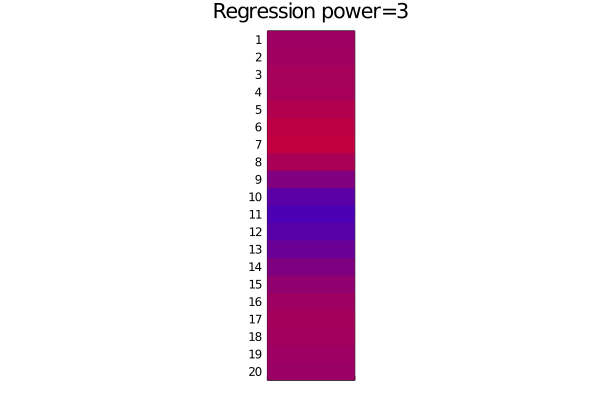

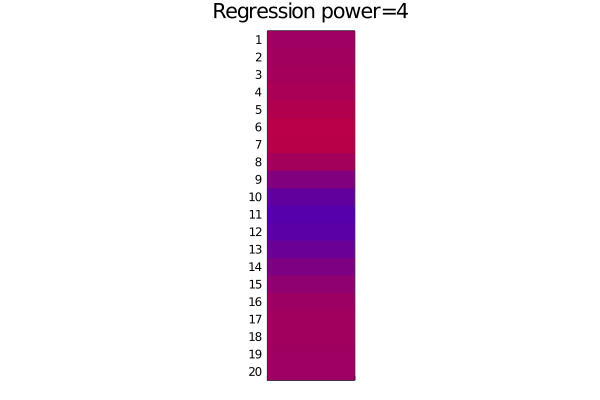

[0.21445835132194077; 0.28849378596770825; 0.27051146582605745; 0.32946200084800936; 0.3180913533039005; 0.5179258721307887; 0.5672567990837679; 0.4239942241060034; -0.007832651016270953; -0.3992566649053964; -0.47010402473745316; -0.33585817735976636; -0.14342783321903163; -0.029521841603780546; 0.13180836993527995; 0.2799442153340269; 0.3165014942896075; 0.27063564851068445; 0.21740246601947968; 0.21500721595749805]
[0.23931978441571566; 0.2578212010385688; 0.29615575088059165; 0.30602160665932243; 0.3884930754275661; 0.467758008172819; 0.5030589651068533; 0.32780612405783344; 0.005634969394778672; -0.29239778021970686; -0.4017396223342053; -0.31646334510541707; -0.16960261739419286; -0.01371376829584408; 0.12741024788850877; 0.24275135985297147; 0.2890271193781063; 0.26817986960659057; 0.2343484434958874; 0.21562267776630617]


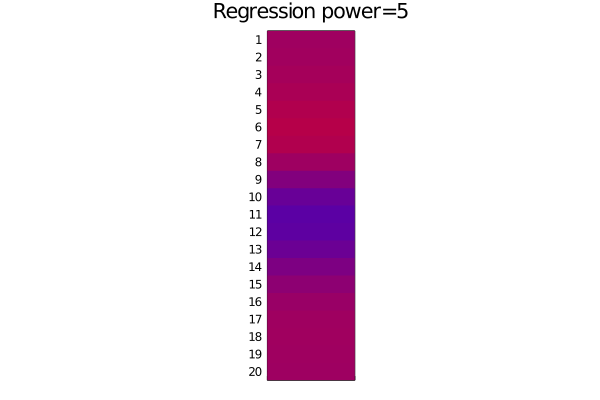

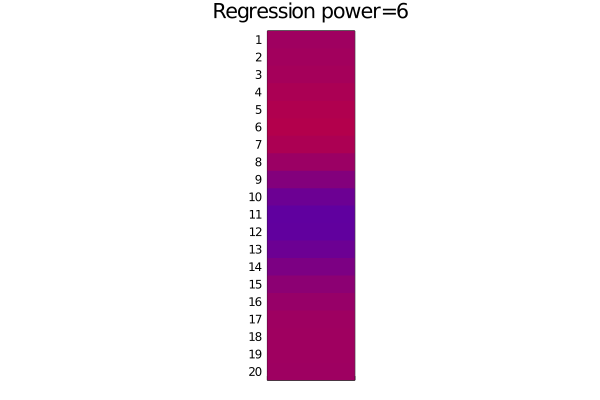

[0.2375878877401969; 0.2644322454449587; 0.28666618619282763; 0.3302234776558267; 0.3874242300865692; 0.4531033495690795; 0.43287436577916855; 0.2788333528531552; 0.01368110441096844; -0.2295008110530445; -0.336866915886443; -0.2959351949446051; -0.16659324359848465; -0.018635379267176073; 0.11881594648187871; 0.21972957570652885; 0.26665278294588945; 0.26385181082686143; 0.23938366362292804; 0.22976363522596976]
[0.24392792280370845; 0.26289543979266106; 0.2937739697645377; 0.3347712979784079; 0.39025035243715844; 0.4244673151449391; 0.3882703560671344; 0.24179627434776407; 0.021004548737026354; -0.18422887417617306; -0.28743430729469754; -0.26646511814317764; -0.1603879392700886; -0.022137558794593976; 0.10663671430707716; 0.20173276837809898; 0.2500780564930932; 0.25662941913189297; 0.2443330365585864; 0.23557839552969823]


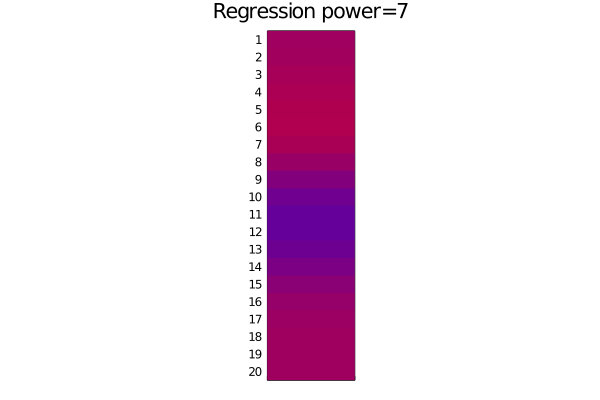

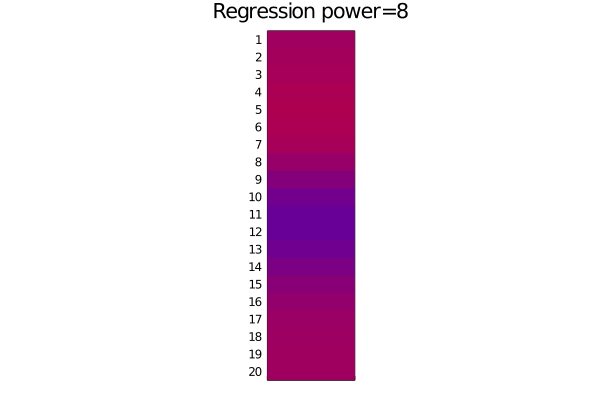

[0.24746725270868924; 0.2668657774536357; 0.29714690251186887; 0.33959854006003465; 0.38316298852016845; 0.4009960078830773; 0.3515113151866125; 0.21702372638397496; 0.02619064963620578; -0.15021954424461478; -0.24604276653801607; -0.23809578823598787; -0.1496635387359534; -0.025296261252535174; 0.09541064129686071; 0.1861491797260898; 0.23614674800102842; 0.25034683739452424; 0.24551361707339253; 0.24127978496399768]
[0.25187093837544094; 0.27049331089139794; 0.3012037400085131; 0.33996947703069064; 0.37458584548776014; 0.3785567705299528; 0.32317701648455494; 0.19824189706893114; 0.030998277258521986; -0.1233572203821417; -0.21145269967287295; -0.21126736450331912; -0.1376851960748255; -0.026516386230542588; 0.08542118659013845; 0.1725688563413263; 0.22421425504054746; 0.2440024008229817; 0.24571341314397147; 0.2447535515820265]


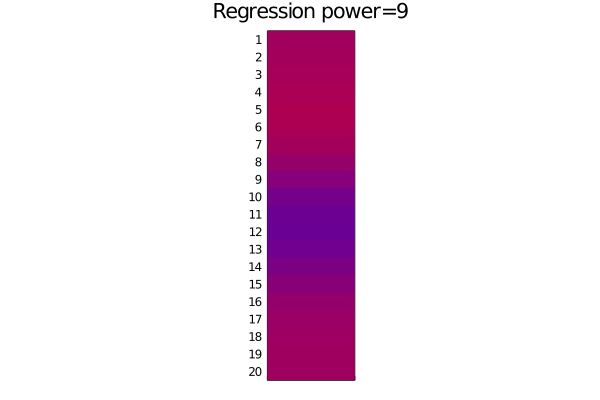

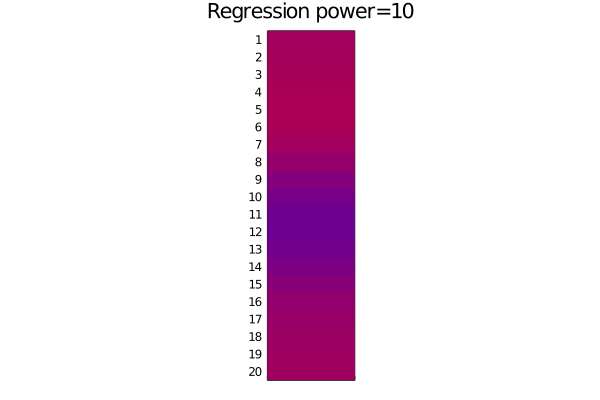

[0.25570593361628846; 0.27452266309178397; 0.3038888426435339; 0.33858635417565464; 0.3643706976828013; 0.35877321083408925; 0.2999918946944795; 0.18413906360400265; 0.03529431798177046; -0.10127054759883088; -0.18202576151944455; -0.18680175341700583; -0.12515631560289578; -0.026260131905076492; 0.07715788556697406; 0.1607347659906707; 0.21359517073495185; 0.2379766896691669; 0.24482312184965987; 0.2474459677004796]
[0.2592248548028507; 0.2780391464505354; 0.3056659533036574; 0.3356152981673299; 0.35391008756418163; 0.34104526773712335; 0.28096805637752387; 0.1731417587600842; 0.03938761132898078; -0.08266733037883496; -0.1566993541784271; -0.1646612768464487; -0.11273940030832605; -0.024752853980332765; 0.07054417321752275; 0.15049594076419887; 0.20410220879826313; 0.23213166075125954; 0.24341525973976874; 0.24932500772214264]


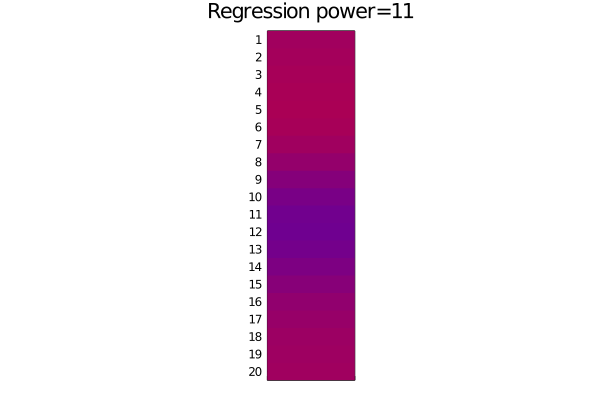

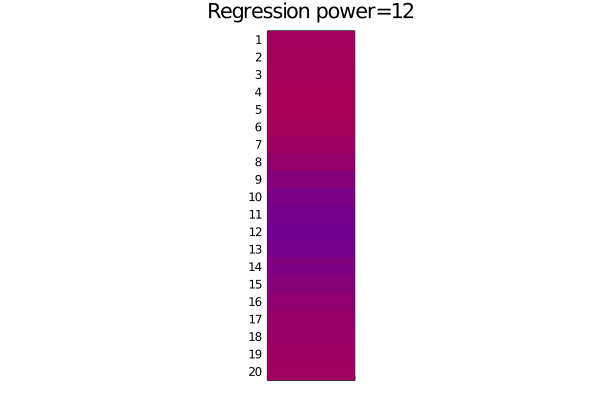

[0.26219633632517625; 0.2809766515190145; 0.30644013264050757; 0.33173044634505633; 0.3435235511562117; 0.32530780389294295; 0.2650516942915771; 0.16449914215552958; 0.04328734657007666; -0.06665969107609376; -0.13467598713457024; -0.14470001044440062; -0.1007178437117025; -0.02231602702371198; 0.06542908666712964; 0.14171410759332825; 0.19557660343790717; 0.22654970976309716; 0.24162397607105696; 0.2506550407549207]
[0.2646093428663705; 0.28320437349489946; 0.30638241016819284; 0.3272313767139252; 0.33352060046473697; 0.31129434978024395; 0.2516195467800166; 0.15761272767239448; 0.04704226588317083; -0.05268277721352917; -0.11534522955168827; -0.1266979470968911; -0.08924462705993837; -0.019201594689428295; 0.06160905574558197; 0.1342399325661217; 0.1879468069314442; 0.2212500964240204; 0.2396095755296916; 0.25149178438371794]


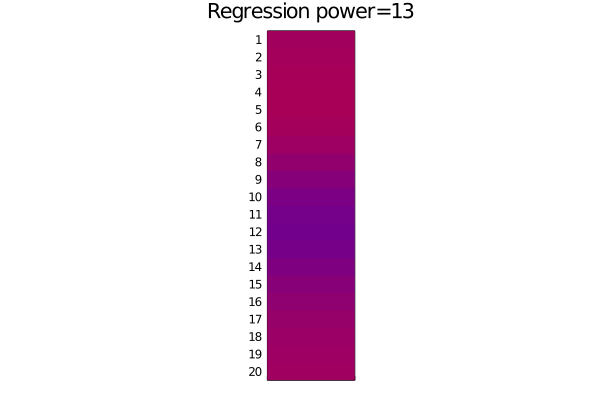

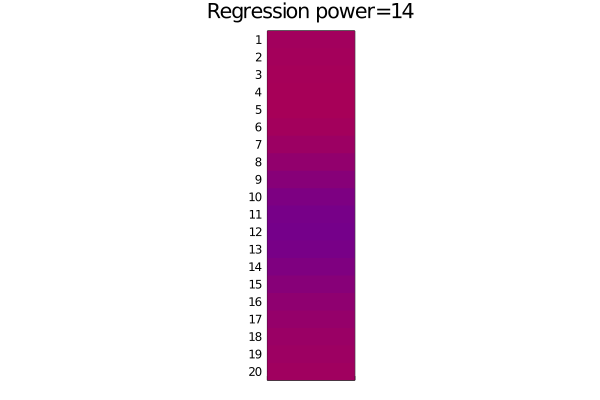

[0.26643516691499597; 0.28473204217648757; 0.3056060534590058; 0.32237812911561836; 0.32401544231963536; 0.29881149900833254; 0.240175541410885; 0.15209151344519395; 0.05065740544734541; -0.040328580294015516; -0.09824198462070283; -0.11042926790283925; -0.07838138961541928; -0.01561238866792826; 0.05888246454075846; 0.127931931747716; 0.1811456119738621; 0.21626882629505206; 0.23745048544581; 0.25190356759326]
[0.2676902588949145; 0.28559108751682977; 0.3042387415837039; 0.31733320829808653; 0.3150683568145287; 0.2876674942462843; 0.2303595179548038; 0.14764148676780808; 0.05414011286617462; -0.029304386489124284; -0.08299994427251915; -0.09568421404632042; -0.06814101539539563; -0.01170377124752972; 0.05706733587351541; 0.12265333608744547; 0.17511545667221; 0.2116216412382414; 0.23520762644470739; 0.25192973998468865]


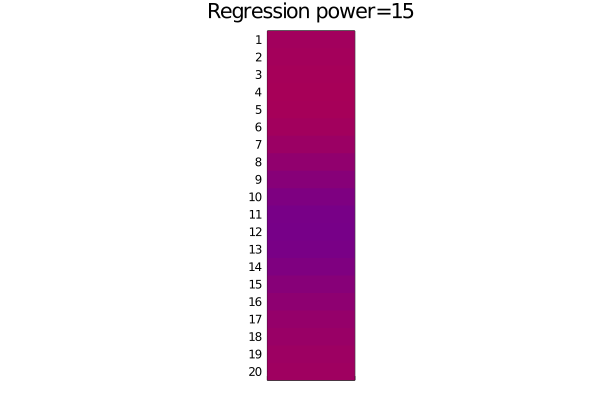

[0.2684036954654776; 0.28584002933181607; 0.3023876791328734; 0.3122134355654397; 0.30668968645296646; 0.27769845633853896; 0.2218894996562987; 0.14404703919626216; 0.05749240438161948; -0.019388072631822947; -0.06932951493598795; -0.08227505790474504; -0.058509666896415236; -0.007592483589803314; 0.056005633571143756; 0.11827870954439032; 0.1697968113326323; 0.20731490811838627; 0.2329196692225458; 0.25160920844143686]
[0.2686176444129102; 0.2855438013100557; 0.3001470480100431; 0.3070969337170932; 0.29886719278564833; 0.26875921414926807; 0.21454499839703325; 0.14114298107806011; 0.06071712364868623; -0.010408394395397182; -0.05699754849085205; -0.07003807991238278; -0.04945906946365451; -0.00336550563835826; 0.055563953175243604; 0.11469371814938879; 0.16513014299846962; 0.20334379622452148; 0.23061459526078965; 0.25097752437648674]


In [27]:
#network feature propagation 
feature_Regression = Dict()
for i in 0:K_MAX   
    feature_Regression[i] = Adj_Normed_Dict[i] * varX
end

for i in 0:K_MAX   
    hVarX = displayProjectedFeatureThres(feature_Regression[i],i) 
    p3=plot(hVarX,layout=1)
    display(p3)
    savefig(p3,"Regression PowThres$(i).png")  
    println(feature_Regression[i])
end


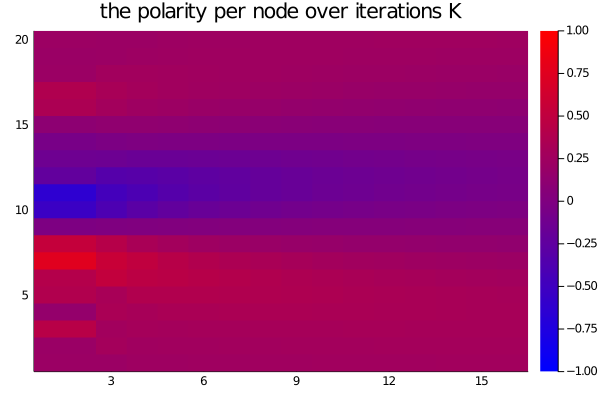

In [28]:
classVec = feature_Regression[1]

for i in 1:K_MAX   
    classVec = hcat(classVec,feature_Regression[i])
end
h1 = heatmap(classVec,fill=cgrad([:blue,:red]),clims=(-1,1))
title!("the polarity per node over iterations K")
display(h1)
savefig(h1,"heatmapProgression.png") 

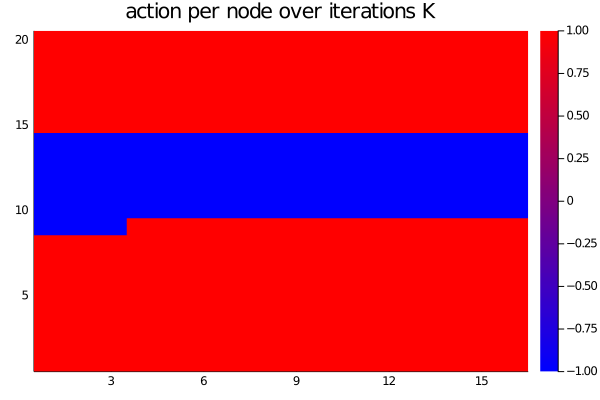

In [29]:
classVecSIGN = sign.(classVec)
h1 = heatmap(classVecSIGN,fill=cgrad([:blue,:red]),clims=(-1,1))
title!("action per node over iterations K")
display(h1)
savefig(h1,"heatmapProgressionSIGN.png") 

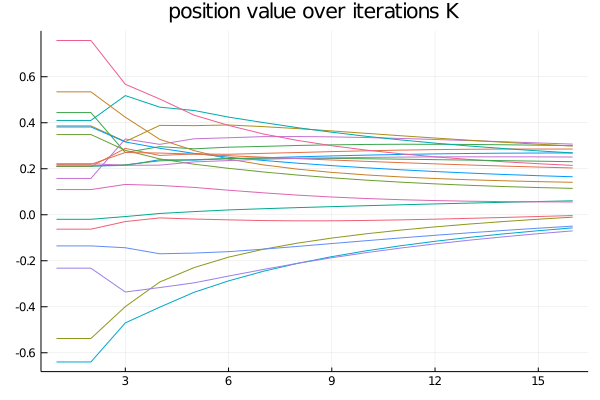

In [30]:
#now plot the lines for each node
p1 = plot(classVec',leg=false)
title!("position value over iterations K")
display(p1)
savefig(p1,"classProgressions.png") 

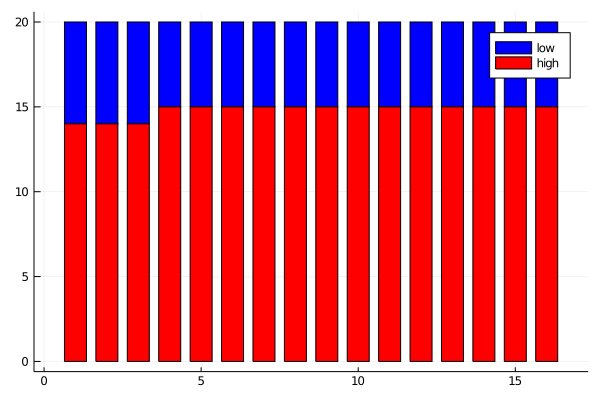

[6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]


In [31]:
lowTotals = [length(findall(classVec[:,i] .<= 0)) for i in 1:size(classVec)[2]]
highTotals = [length(findall(classVec[:,i] .> 0)) for i in 1:size(classVec)[2]]
println(lowTotals)
println(highTotals)
#now show the distribution between polar sides as total sum above or below
g1 = groupedbar(hcat(lowTotals,highTotals),label=["low" "high"],c=[:blue :red],
        bar_position = :stack, bar_width=0.7)
display(g1)
savefig(g1,"groupProgressions.png") 

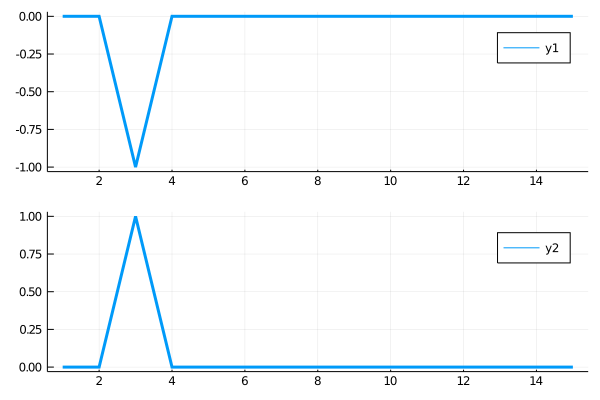

In [32]:

lowTotalsDiff = diff(lowTotals)
highTotalsDiff = diff(highTotals)
p1 = plot([lowTotalsDiff highTotalsDiff], layout=(2,1),linewidth=3)
display(p1)
savefig(p1,"diffsProgressions.png") 

In [33]:
#returns array with class probabilities
function softmax(a)
    c = maximum(a)
    exp.(a) / sum(exp.(a)) #or via exp.(a .- c) / sum(exp.(a .- c))
end
#logistic function
function logisticFN(x)
    return 1/(1 + exp(-x))
end


logisticFN (generic function with 1 method)

In [104]:
#now use a 2D class projection on features of the 'right' and that of the 'left'
#each person has 3 variables, 2 of which are categorical with one hot encoding, and the other numerical 
#ok, need a new application to put forward...

#what kind of classes are we predicting?: how about purely hypothetical component vectors for 3 types?
theta1 = [0,0,1, 0,0,1,   1.0]
theta2 = [0,1,0, 0,1,0,   1.0]
theta3 = [1,0,0, 1,-1,-1, -1.0]

thetaMat = hcat(theta1,theta2,theta3)

7×3 Array{Float64,2}:
 0.0  0.0   1.0
 0.0  1.0   0.0
 1.0  0.0   0.0
 0.0  0.0   1.0
 0.0  1.0  -1.0
 1.0  0.0  -1.0
 1.0  1.0  -1.0

In [105]:
classLabels = vcat(repeat([1],20,1),repeat([2],15,1),repeat([3],10,1));

In [106]:
Xvars = zeros(length(classLabels),length(theta1))
for row in 1:length(classLabels)
    ind = classLabels[row]
    if(rand() < 0.2)
        part1 = shuffle(thetaMat[1:3,ind])
    else
        part1 = thetaMat[1:3,ind]
    end
    part2 = sign.(round.(rand(3) .+ thetaMat[4:6,ind]))
    part3 = randn() + thetaMat[7,ind]
    
    Xvars[row,:] = hcat(part1',part2',part3')
end
Xvars

45×7 Array{Float64,2}:
 0.0  0.0  1.0  1.0   1.0   1.0   0.992878 
 0.0  0.0  1.0  0.0   0.0   1.0  -0.794488 
 0.0  0.0  1.0  1.0   0.0   1.0   1.58465  
 0.0  0.0  1.0  1.0   1.0   1.0   0.854309 
 0.0  0.0  1.0  0.0   1.0   1.0   0.602771 
 1.0  0.0  0.0  0.0   1.0   1.0  -1.14772  
 0.0  0.0  1.0  0.0   1.0   1.0  -0.569977 
 0.0  0.0  1.0  1.0   1.0   1.0   1.92477  
 0.0  0.0  1.0  1.0   0.0   1.0   1.86711  
 0.0  0.0  1.0  0.0   0.0   1.0   0.691809 
 0.0  0.0  1.0  0.0   0.0   1.0  -0.341603 
 0.0  0.0  1.0  0.0   1.0   1.0   0.551406 
 0.0  0.0  1.0  0.0   0.0   1.0   2.05799  
 ⋮                          ⋮              
 1.0  0.0  0.0  1.0   1.0   0.0   1.49381  
 0.0  1.0  0.0  1.0   1.0   0.0   1.20552  
 1.0  0.0  0.0  1.0  -1.0  -0.0  -1.02023  
 1.0  0.0  0.0  1.0  -1.0  -0.0  -0.0118897
 1.0  0.0  0.0  1.0  -0.0  -1.0   0.0478529
 1.0  0.0  0.0  1.0  -1.0  -1.0  -0.481332 
 1.0  0.0  0.0  1.0  -0.0  -1.0  -0.548542 
 1.0  0.0  0.0  1.0  -0.0  -1.0  -0.0389394
 1.0  0.0

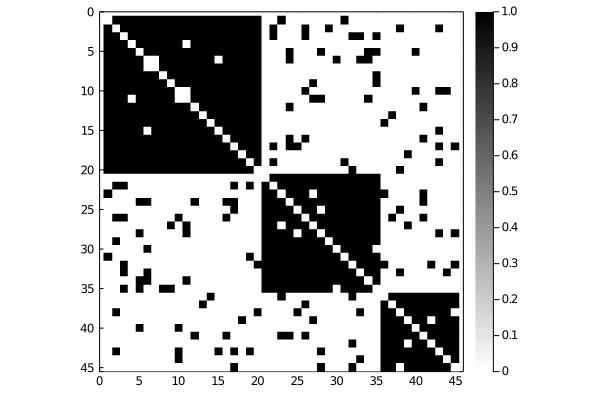

In [107]:
#now to produce the adjacency matrix, how to produce the block diagonal?..
#how about 8 nodes for the before and after like +/-4 and a random 0.5 for each other node
function vizMatrixBlock(Adj,NN)
    
    hAdjNN1 = heatmap(Adj,
        showaxis=true,yaxis=:flip,aspect_ratio=1.0,
        framestyle=:box,xlims=(0.0,NN+1.0),
        legend=true,ylims=(0.0,NN+0.5),
        yticks=0:5:NN,xticks=0:5:NN,
        fill=cgrad([:white,:black]))#c=cgrad([:white,:black],clims=(0,1)))
    return hAdjNN1
end
function makeBlockDiagonalAdjacency()
    NN = length(classLabels)
    #make the adjacency for the ring network
    AdjNN = zeros(NN,NN)
    for ii in 1:size(AdjNN)[1]        
        for jj in 1:size(AdjNN)[2]   
            if(ii != jj)
                if(classLabels[ii] == classLabels[jj] && rand() < 0.8)                                            
                        AdjNN[ii,jj] = 1                
                        AdjNN[jj,ii] = 1                        
                elseif(rand() < 0.05)
                    AdjNN[ii,jj] = 1                
                    AdjNN[jj,ii] = 1                        
                end
            end
        end
    end    
    return AdjNN
end

adjMatrixBlock = makeBlockDiagonalAdjacency()
hVarX = vizMatrixBlock(adjMatrixBlock,length(classLabels))
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"blockDiagonalmatrix.png")


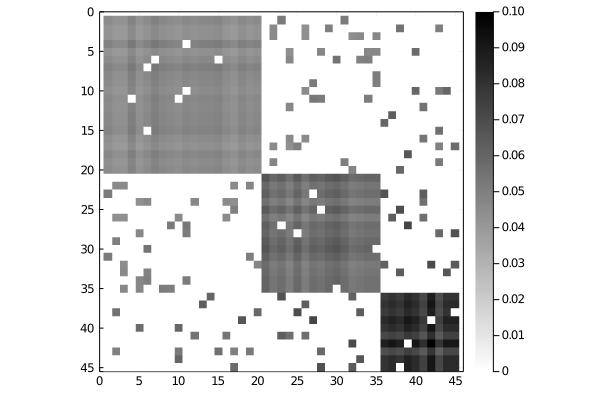

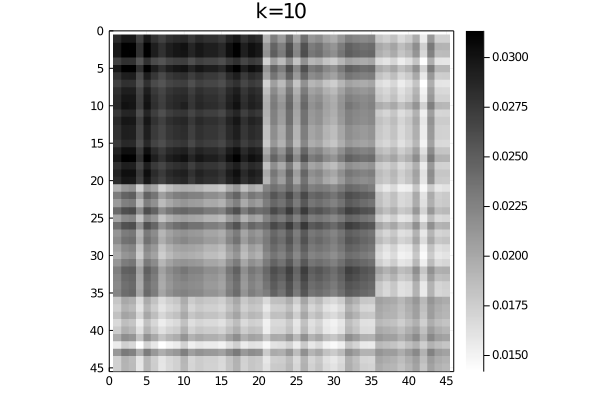

45×3 Array{Float64,2}:
  2.46964    1.29168   -1.65232 
  2.05766    1.33716   -1.22216 
  2.27731    1.53623   -1.69335 
  2.3356     1.16817   -1.56182 
  2.34345    1.57201   -1.46263 
  2.31921    1.58781   -1.59993 
  2.42585    1.1583    -1.60201 
  2.36257    1.25976   -1.57894 
  2.50113    1.47538   -1.73552 
  1.94252    1.02458   -0.879513
  2.41814    1.50932   -1.67864 
  2.29439    1.26453   -1.41868 
  2.29982    1.03115   -1.32721 
  ⋮                             
  1.46499    2.43524   -1.51797 
  1.8724     2.57758   -1.73059 
 -0.697751  -0.568104   2.60924 
 -0.728541  -0.66517    2.78263 
 -0.362815  -0.339036   2.08797 
 -0.670811  -0.59729    2.69134 
 -0.755469  -0.870219   2.86975 
 -0.454757  -0.165127   2.28948 
 -0.982079  -0.841949   2.87547 
 -0.183934  -0.538317   2.27298 
 -0.86213   -0.852918   2.91018 
 -0.703198  -0.70277    2.64808 

In [108]:
#draw the S mat as the normalized version
adjMatrixBlockSMAT = adjacency2Smatrix(deepcopy(adjMatrixBlock))
hVarX = vizMatrixBlock(adjMatrixBlockSMAT,length(classLabels))
p1=plot(hVarX,layout=1)
display(p1)
savefig(p1,"blockDiagonalmatrixSMAT.png")

hVarX = vizMatrixBlock(adjMatrixBlockSMAT^10,length(classLabels))
p1=plot(hVarX,layout=1)
title!("k=10")
display(p1)
savefig(p1,"blockDiagonalmatrixSMATk10.png")


projectionMat = adjMatrixBlockSMAT * Xvars * thetaMat

In [109]:
softmax(projectionMat[2,:])

3-element Array{Float64,1}:
 0.6561059288641121  
 0.31920141493889054 
 0.024692656196997412

In [115]:

categoriesOverK = zeros(size(categoryProbs)[1],K_MAX)

for k in 1:K_MAX
    projectionMat = adjMatrixBlockSMAT^k * Xvars * thetaMat
    categoryProbs = zeros(size(projectionMat))
    for row in 1:size(categoryProbs)[1]
        categoryProbs[row,:] = softmax(projectionMat[row,:])
    end
    cartInds = findmax(categoryProbs,dims=2)[2]
    categories = map(x -> x[2],cartInds)
    categoriesOverK[:,k] = categories[:]
end

categoriesOverK

45×15 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 

In [35]:
#note that the SGC does not permit readily non-linear effects like interactions to be encoded directly